In [1]:
path = 'C:/Users/ISHMO_CT/Downloads/my-projects/simple_lin_clas_env/data/um-game-playing-strength-of-mcts-variants/train.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Id,GameRulesetName,agent1,agent2,Properties,Format,Time,Discrete,Realtime,Turns,...,DoLudeme,Trigger,PlayoutsPerSecond,MovesPerSecond,EnglishRules,LudRules,num_wins_agent1,num_draws_agent1,num_losses_agent1,utility_agent1
0,0,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-ProgressiveHistory-0.6-Random200-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",4,0,11,-0.466667
1,1,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-UCB1GRAVE-0.6-NST-true,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333
2,2,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.1-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",7,0,8,-0.066667
3,3,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.6-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333
4,4,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1GRAVE-1.41421356237-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333


In [5]:
# do exploratory data analysis 
print(df.isnull().sum(), df.shape, df.describe(), df.columns, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233234 entries, 0 to 233233
Columns: 814 entries, Id to utility_agent1
dtypes: float64(201), int64(608), object(5)
memory usage: 1.4+ GB
Id                   0
GameRulesetName      0
agent1               0
agent2               0
Properties           0
                    ..
LudRules             0
num_wins_agent1      0
num_draws_agent1     0
num_losses_agent1    0
utility_agent1       0
Length: 814, dtype: int64 (233234, 814)                   Id  Properties    Format      Time  Discrete  Realtime  \
count  233234.000000    233234.0  233234.0  233234.0  233234.0  233234.0   
mean   116616.500000         1.0       1.0       1.0       1.0       0.0   
std     67329.000679         0.0       0.0       0.0       0.0       0.0   
min         0.000000         1.0       1.0       1.0       1.0       0.0   
25%     58308.250000         1.0       1.0       1.0       1.0       0.0   
50%    116616.500000         1.0       1.0       1.0       1.0  

In [6]:
# # Lets build an iteractive histogram with numerical features columns
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express   as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# numerical_features = ['PlayoutsPerSecond', 'MovesPerSecond', 'num_wins_agent1', 'num_draws_agent1', 'num_losses_agent1', 'utility_agent1']
# fig = make_subplots(rows=2, cols=3, subplot_titles=numerical_features)

# for i, feature in enumerate(numerical_features):
#     row = (i // 3) + 1
#     col = (i % 3) + 1
#     fig.add_trace(go.Histogram(x=df[feature]), row=row, col=col)

# fig.show()

In [7]:
# drop the index column 
df = df.drop(columns='Id')

In [8]:
# drop columns filled with NaN completely and columns that are not in test set
columns_to_drop = ['Behaviour', 'StateRepetition', 'Duration', 
                   'Complexity', 'BoardCoverage', 'GameOutcome', 
                   'StateEvaluation', 'Clarity', 'Decisiveness', 
                   'Drama', 'MoveEvaluation', 'StateEvaluationDifference', 
                   'BoardSitesOccupied', 'BranchingFactor', 'DecisionFactor', 
                   'MoveDistance', 'PieceNumber', 'ScoreDifference', 'num_wins_agent1', 'num_draws_agent1', 'num_losses_agent1']
df = df.drop(columns=columns_to_drop)

In [9]:
target = 'utility_agent1'
y = df[target]
X = df.drop(columns=target)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.9)

In [11]:
# get the baseline using mean absolute error 
from sklearn.metrics import  mean_absolute_error
# get the  prediction using the mean 
y_pred_baseline = [y_train.mean()] * len(y_train)
baseline_mean_error  = mean_absolute_error(y_train, y_pred_baseline)
print(baseline_mean_error)

0.5050779513324228


In [12]:
# dataframe without the target (first drop the target)
df_target_off = df.drop(columns='utility_agent1')


# find out the categorical and numerical columns for preprocessing 
categorical_columns = df_target_off.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df_target_off.select_dtypes(include=['int64', 'float64']).columns.to_list()
print((categorical_columns))
print((numerical_columns))


['GameRulesetName', 'agent1', 'agent2', 'EnglishRules', 'LudRules']
['Properties', 'Format', 'Time', 'Discrete', 'Realtime', 'Turns', 'Alternating', 'Simultaneous', 'Stochastic', 'HiddenInformation', 'Match', 'Asymmetric', 'AsymmetricRules', 'AsymmetricPlayRules', 'AsymmetricEndRules', 'AsymmetricForces', 'AsymmetricSetup', 'AsymmetricPiecesType', 'Players', 'NumPlayers', 'Simulation', 'Solitaire', 'TwoPlayer', 'Multiplayer', 'PlayersWithDirections', 'Cooperation', 'Team', 'Coalition', 'Puzzle', 'DeductionPuzzle', 'PlanningPuzzle', 'Equipment', 'Container', 'Board', 'Shape', 'SquareShape', 'HexShape', 'TriangleShape', 'DiamondShape', 'RectangleShape', 'SpiralShape', 'CircleShape', 'PrismShape', 'StarShape', 'ParallelogramShape', 'SquarePyramidalShape', 'RectanglePyramidalShape', 'RegularShape', 'PolygonShape', 'TargetShape', 'Tiling', 'SquareTiling', 'HexTiling', 'TriangleTiling', 'BrickTiling', 'SemiRegularTiling', 'CelticTiling', 'MorrisTiling', 'QuadHexTiling', 'CircleTiling', 'Conc

In [13]:
# PRERPOCESSING 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

proprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns),
        ('cat_impute', SimpleImputer(strategy='mean'), numerical_columns), 
    ]
)

In [14]:
# Build a parameter grid for the decision tree
para_grid = {
    'decisiontreeregressor__max_depth': [3, 5, 10],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 5, 10],
}

In [15]:
# pipeline for model 
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
model_dt = make_pipeline(
    proprocessor,
    DecisionTreeRegressor()
)

In [16]:
from sklearn.model_selection import GridSearchCV

grid_search =GridSearchCV(model_dt,  para_grid, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\pipeline.py", line 1000, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ISHMO_CT\.virtu

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['GameRulesetName',
                                                                          'agent1',
                                                                          'agent2',
                                                                          'EnglishRules',
                                                                          'LudRules']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Properties',
                                                                          'Format',
                                                                          'Time',
                                                                          'Discrete',
                                                                          'Realtime',
                                                                          'Turns',
                                                                          'Alternating',
                                                                          'Simultaneous',
                                                                          'Stochastic',
                                                                          'HiddenInformation',
                                                                          'Match',
                                                                          'Asymmetric...
                                                                          'Simulation',
                                                                          'Solitaire',
                                                                          'TwoPlayer',
                                                                          'Multiplayer',
                                                                          'PlayersWithDirections',
                                                                          'Cooperation',
                                                                          'Team',
                                                                          'Coalition',
                                                                          'Puzzle',
                                                                          'DeductionPuzzle', ...])])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [3, 5, 10],
                         'decisiontreeregressor__min_samples_leaf': [1, 5, 10],
                         'decisiontreeregressor__min_samples_split': [2, 5,
                                                                      10]})

In [17]:
feature_names = [f"{i}" for i in X_train.columns] 
feature_names

['GameRulesetName',
 'agent1',
 'agent2',
 'Properties',
 'Format',
 'Time',
 'Discrete',
 'Realtime',
 'Turns',
 'Alternating',
 'Simultaneous',
 'Stochastic',
 'HiddenInformation',
 'Match',
 'Asymmetric',
 'AsymmetricRules',
 'AsymmetricPlayRules',
 'AsymmetricEndRules',
 'AsymmetricForces',
 'AsymmetricSetup',
 'AsymmetricPiecesType',
 'Players',
 'NumPlayers',
 'Simulation',
 'Solitaire',
 'TwoPlayer',
 'Multiplayer',
 'PlayersWithDirections',
 'Cooperation',
 'Team',
 'Coalition',
 'Puzzle',
 'DeductionPuzzle',
 'PlanningPuzzle',
 'Equipment',
 'Container',
 'Board',
 'Shape',
 'SquareShape',
 'HexShape',
 'TriangleShape',
 'DiamondShape',
 'RectangleShape',
 'SpiralShape',
 'CircleShape',
 'PrismShape',
 'StarShape',
 'ParallelogramShape',
 'SquarePyramidalShape',
 'RectanglePyramidalShape',
 'RegularShape',
 'PolygonShape',
 'TargetShape',
 'Tiling',
 'SquareTiling',
 'HexTiling',
 'TriangleTiling',
 'BrickTiling',
 'SemiRegularTiling',
 'CelticTiling',
 'MorrisTiling',
 'QuadH

In [18]:
# lets ge the best parameters esitimator 
# Access the best estimator
# Get the best estimator
best_model = grid_search.best_estimator_

In [19]:
# Get the decision tree regressor from the pipeline
dt_regressor = best_model.steps[-1][1]

In [21]:
# Fit the proprocessor
proprocessor.fit(X_train)
feature_names = proprocessor.get_feature_names_out()
feature_names.tolist()

['cat__GameRulesetName_00Y',
 'cat__GameRulesetName_1D_Chess',
 'cat__GameRulesetName_20_SquaresSeleucid_Scholarly',
 'cat__GameRulesetName_3D_Tic-Tac-Toe',
 'cat__GameRulesetName_4_Squared',
 'cat__GameRulesetName_58_HolesCarnarvon_and_Carter_D6_Suggested',
 'cat__GameRulesetName_58_HolesCarnarvon_and_Carter_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_1_D4_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_1_D6_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_1_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_2_D4_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_2_D6_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_2_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_3_D4_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_3_D6_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_3_Suggested',
 'cat__GameRulesetName_58_HolesCarter_Crossover_4_D4_Suggested',
 'cat__GameRulesetName_58_HolesCarte

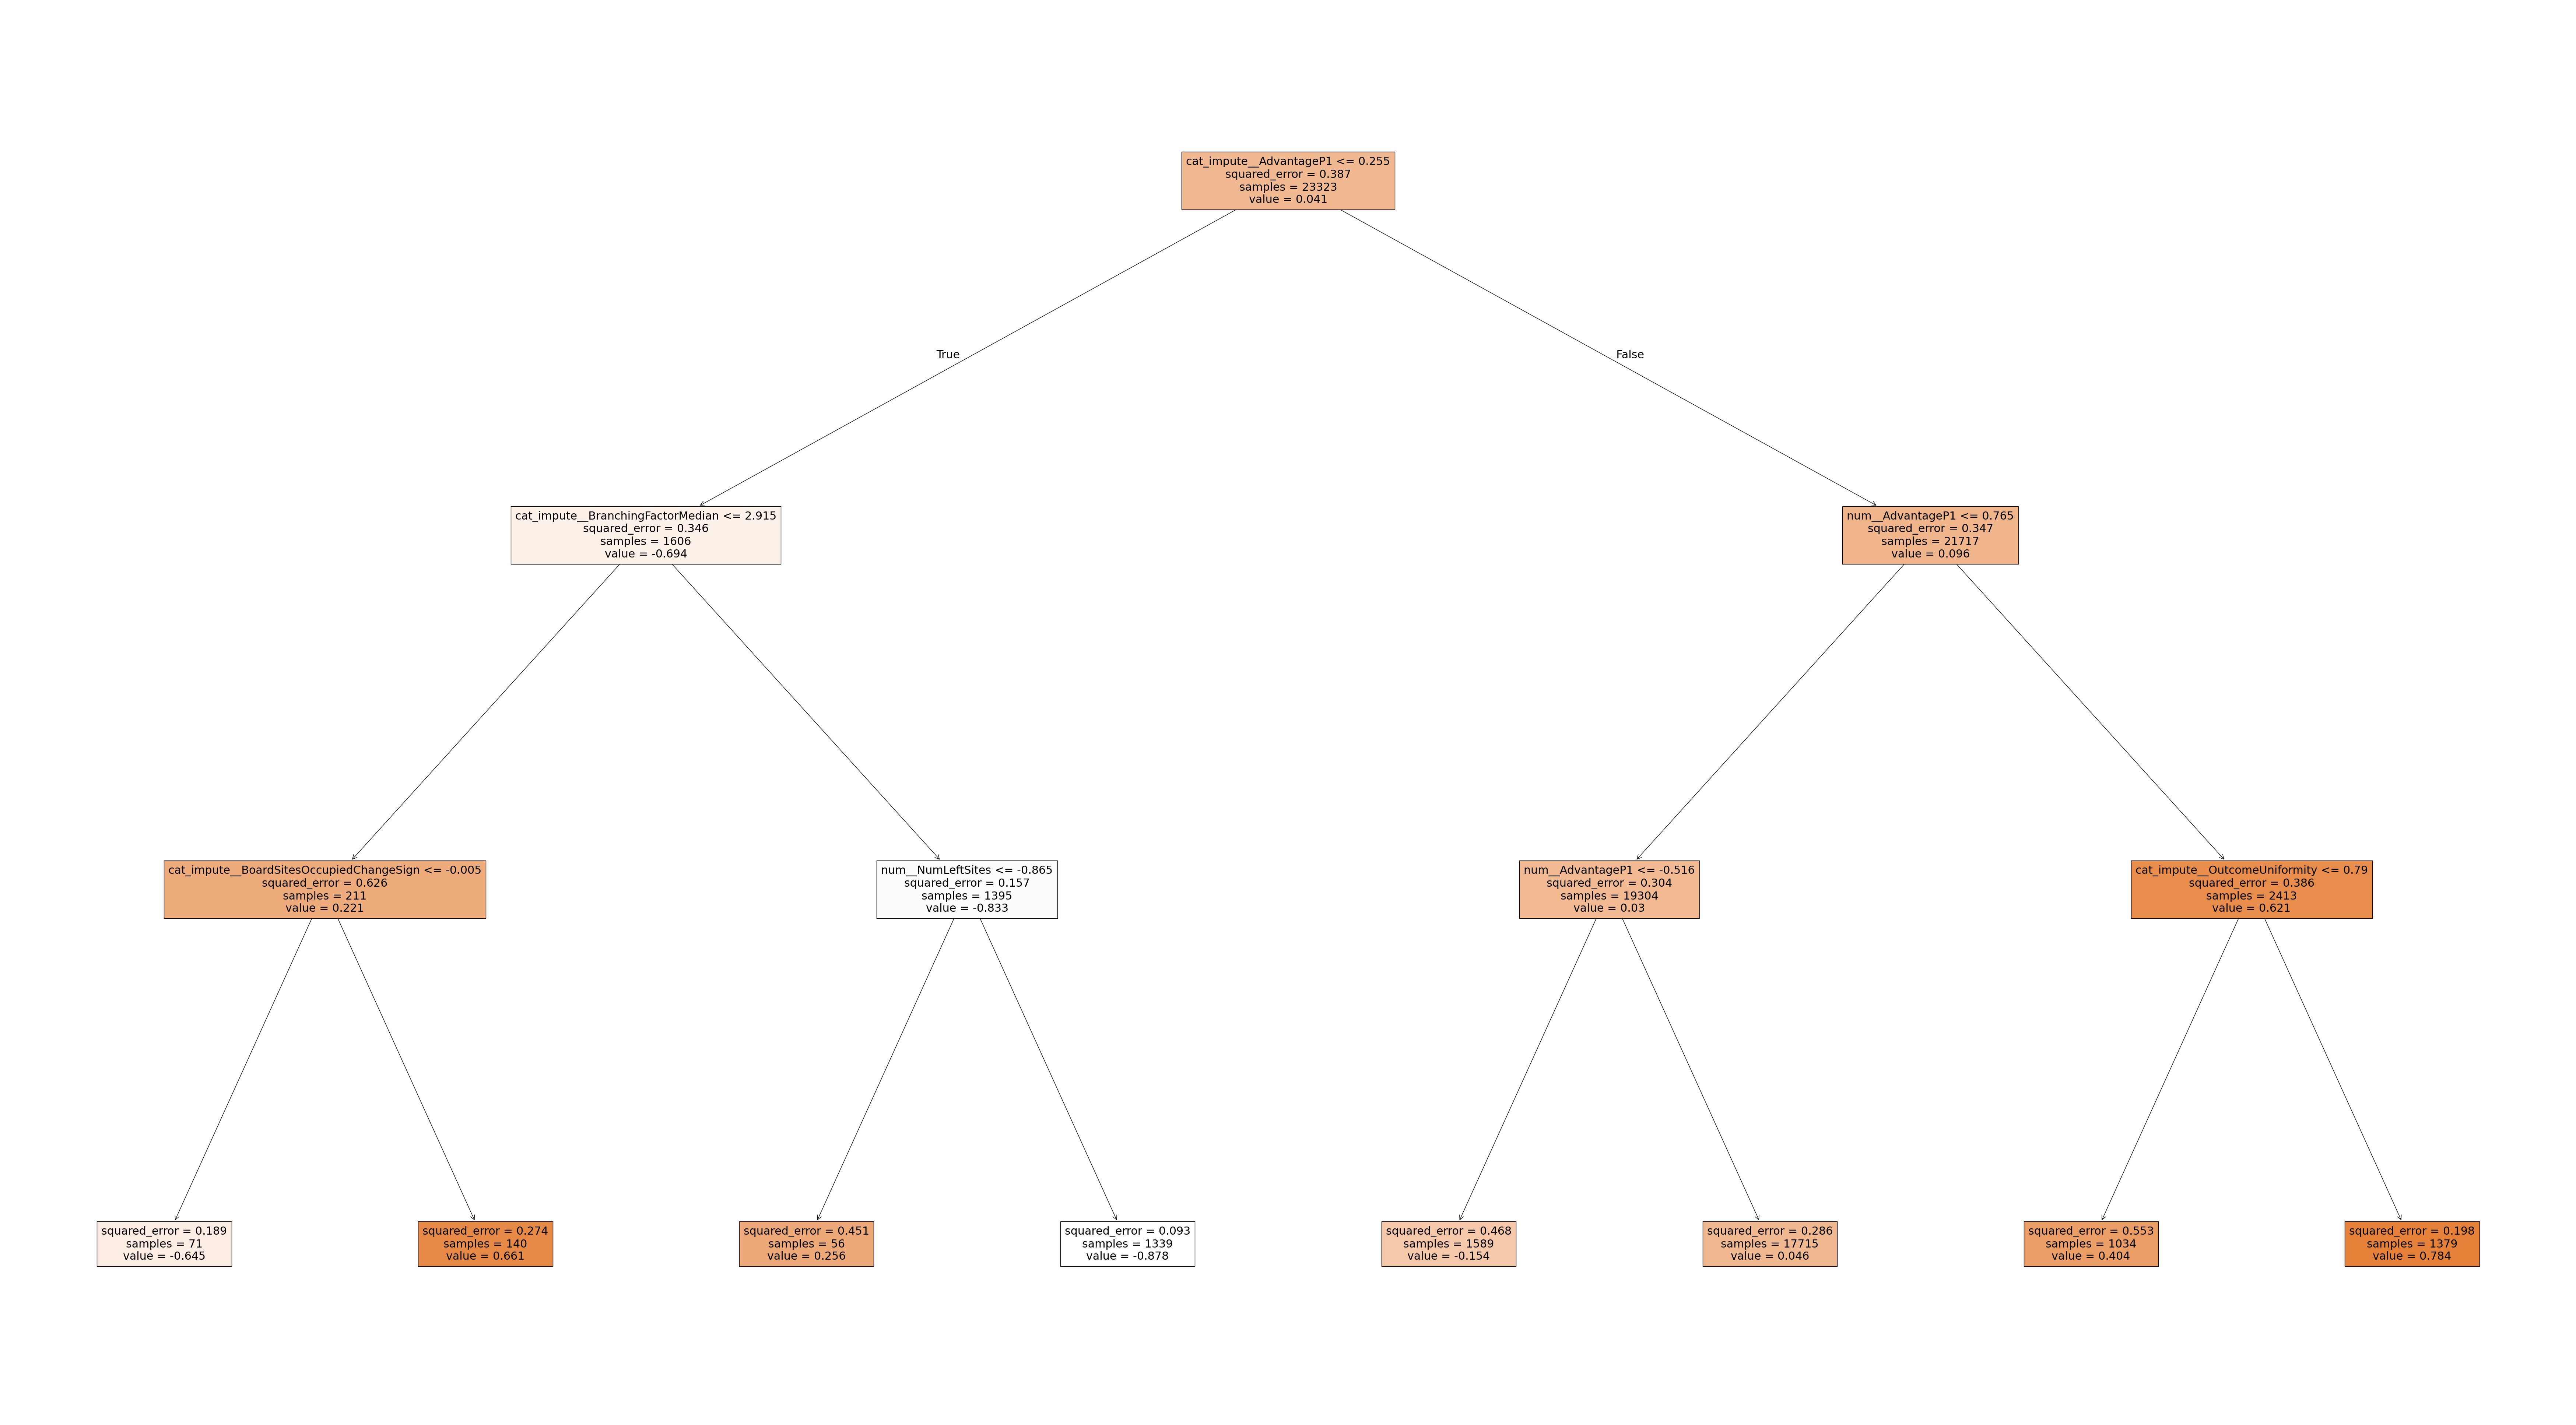

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(90,50))
plot_tree(dt_regressor, feature_names=feature_names, class_names=['utility_agent1'], filled=True)
plt.show()

In [15]:
# from tqdm import tqdm# Create a tqdm progress bar
# with tqdm(total=1) as pbar:  # total=1 since fit is usually a single call
#     model_dt.fit(X_train, y_train)
#     pbar.update(1)  # Update progress after fit

In [16]:
# check metrics for trained data 
# me_trained = model_dt.score(X_train, y_train)
# print(me_trained)

In [28]:
# predict for the val set 
y_val_pred = grid_search.predict(X_val)

In [30]:
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
val_mae = mean_absolute_error(y_val, y_val_pred) # difference betwen pred values and actual values 
val_mase = mean_squared_error(y_val, y_val_pred) # average square errors
val_r2 = r2_score(y_val, y_val_pred) # independent variables explain the variability of the dependent variable. It ranges from 0 to 1, where a value of 1 indicates that the model perfectly explains the variability.
me_score = grid_search.score(X_val, y_val) #same as r2
print(val_mae)
print(val_mase)
print(val_r2)
print(me_score)

0.424152336174563
0.2955760643780873
0.23824174021067213
0.23824174021067213


The model is over fitting 

In [19]:
# # test set 
# test_path = 'C:/Users/ISHMO_CT/Downloads/my-projects/simple_lin_clas_env/Data/um-game-playing-strength-of-mcts-variants/test.csv'
# test_df = pd.read_csv(test_path)

# # drop columns filled with NaN completely 
# columns_to_drop = ['Id', 'Behaviour', 'StateRepetition', 'Duration', 
#                    'Complexity', 'BoardCoverage', 'GameOutcome', 
#                    'StateEvaluation', 'Clarity', 'Decisiveness', 
#                    'Drama', 'MoveEvaluation', 'StateEvaluationDifference', 
#                    'BoardSitesOccupied', 'BranchingFactor', 'DecisionFactor', 
#                    'MoveDistance', 'PieceNumber', 'ScoreDifference']

# test_df_after_drop = test_df.drop(columns=columns_to_drop)
# test_df_after_drop.head()

In [20]:
# predict for the test set 
# test_pred = model_dt.predict(test_df_after_drop)

In [21]:
# test_pred

In [22]:
# test_pred_df = pd.DataFrame(
#     {
#         'id': test_df['Id'],
#         'predictions': test_pred
#     }
# )

In [23]:
# test_pred_df.to_csv('submission.csv', index=False)

In [24]:
# import joblib

# # Assume your trained model is stored in a variable called 'model'
# # Save the model to a file
# joblib.dump(model_dt, 'model_dt.joblib')

# print("Model saved as 'model_filename.joblib'")

